# Análise exploratória

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/synthetic_coffee_health_10000(in).csv')

In [ ]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [ ]:
df.shape

(10000, 16)

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [ ]:
df.drop(columns='Health_Issues', inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

# Visualização e Insights

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

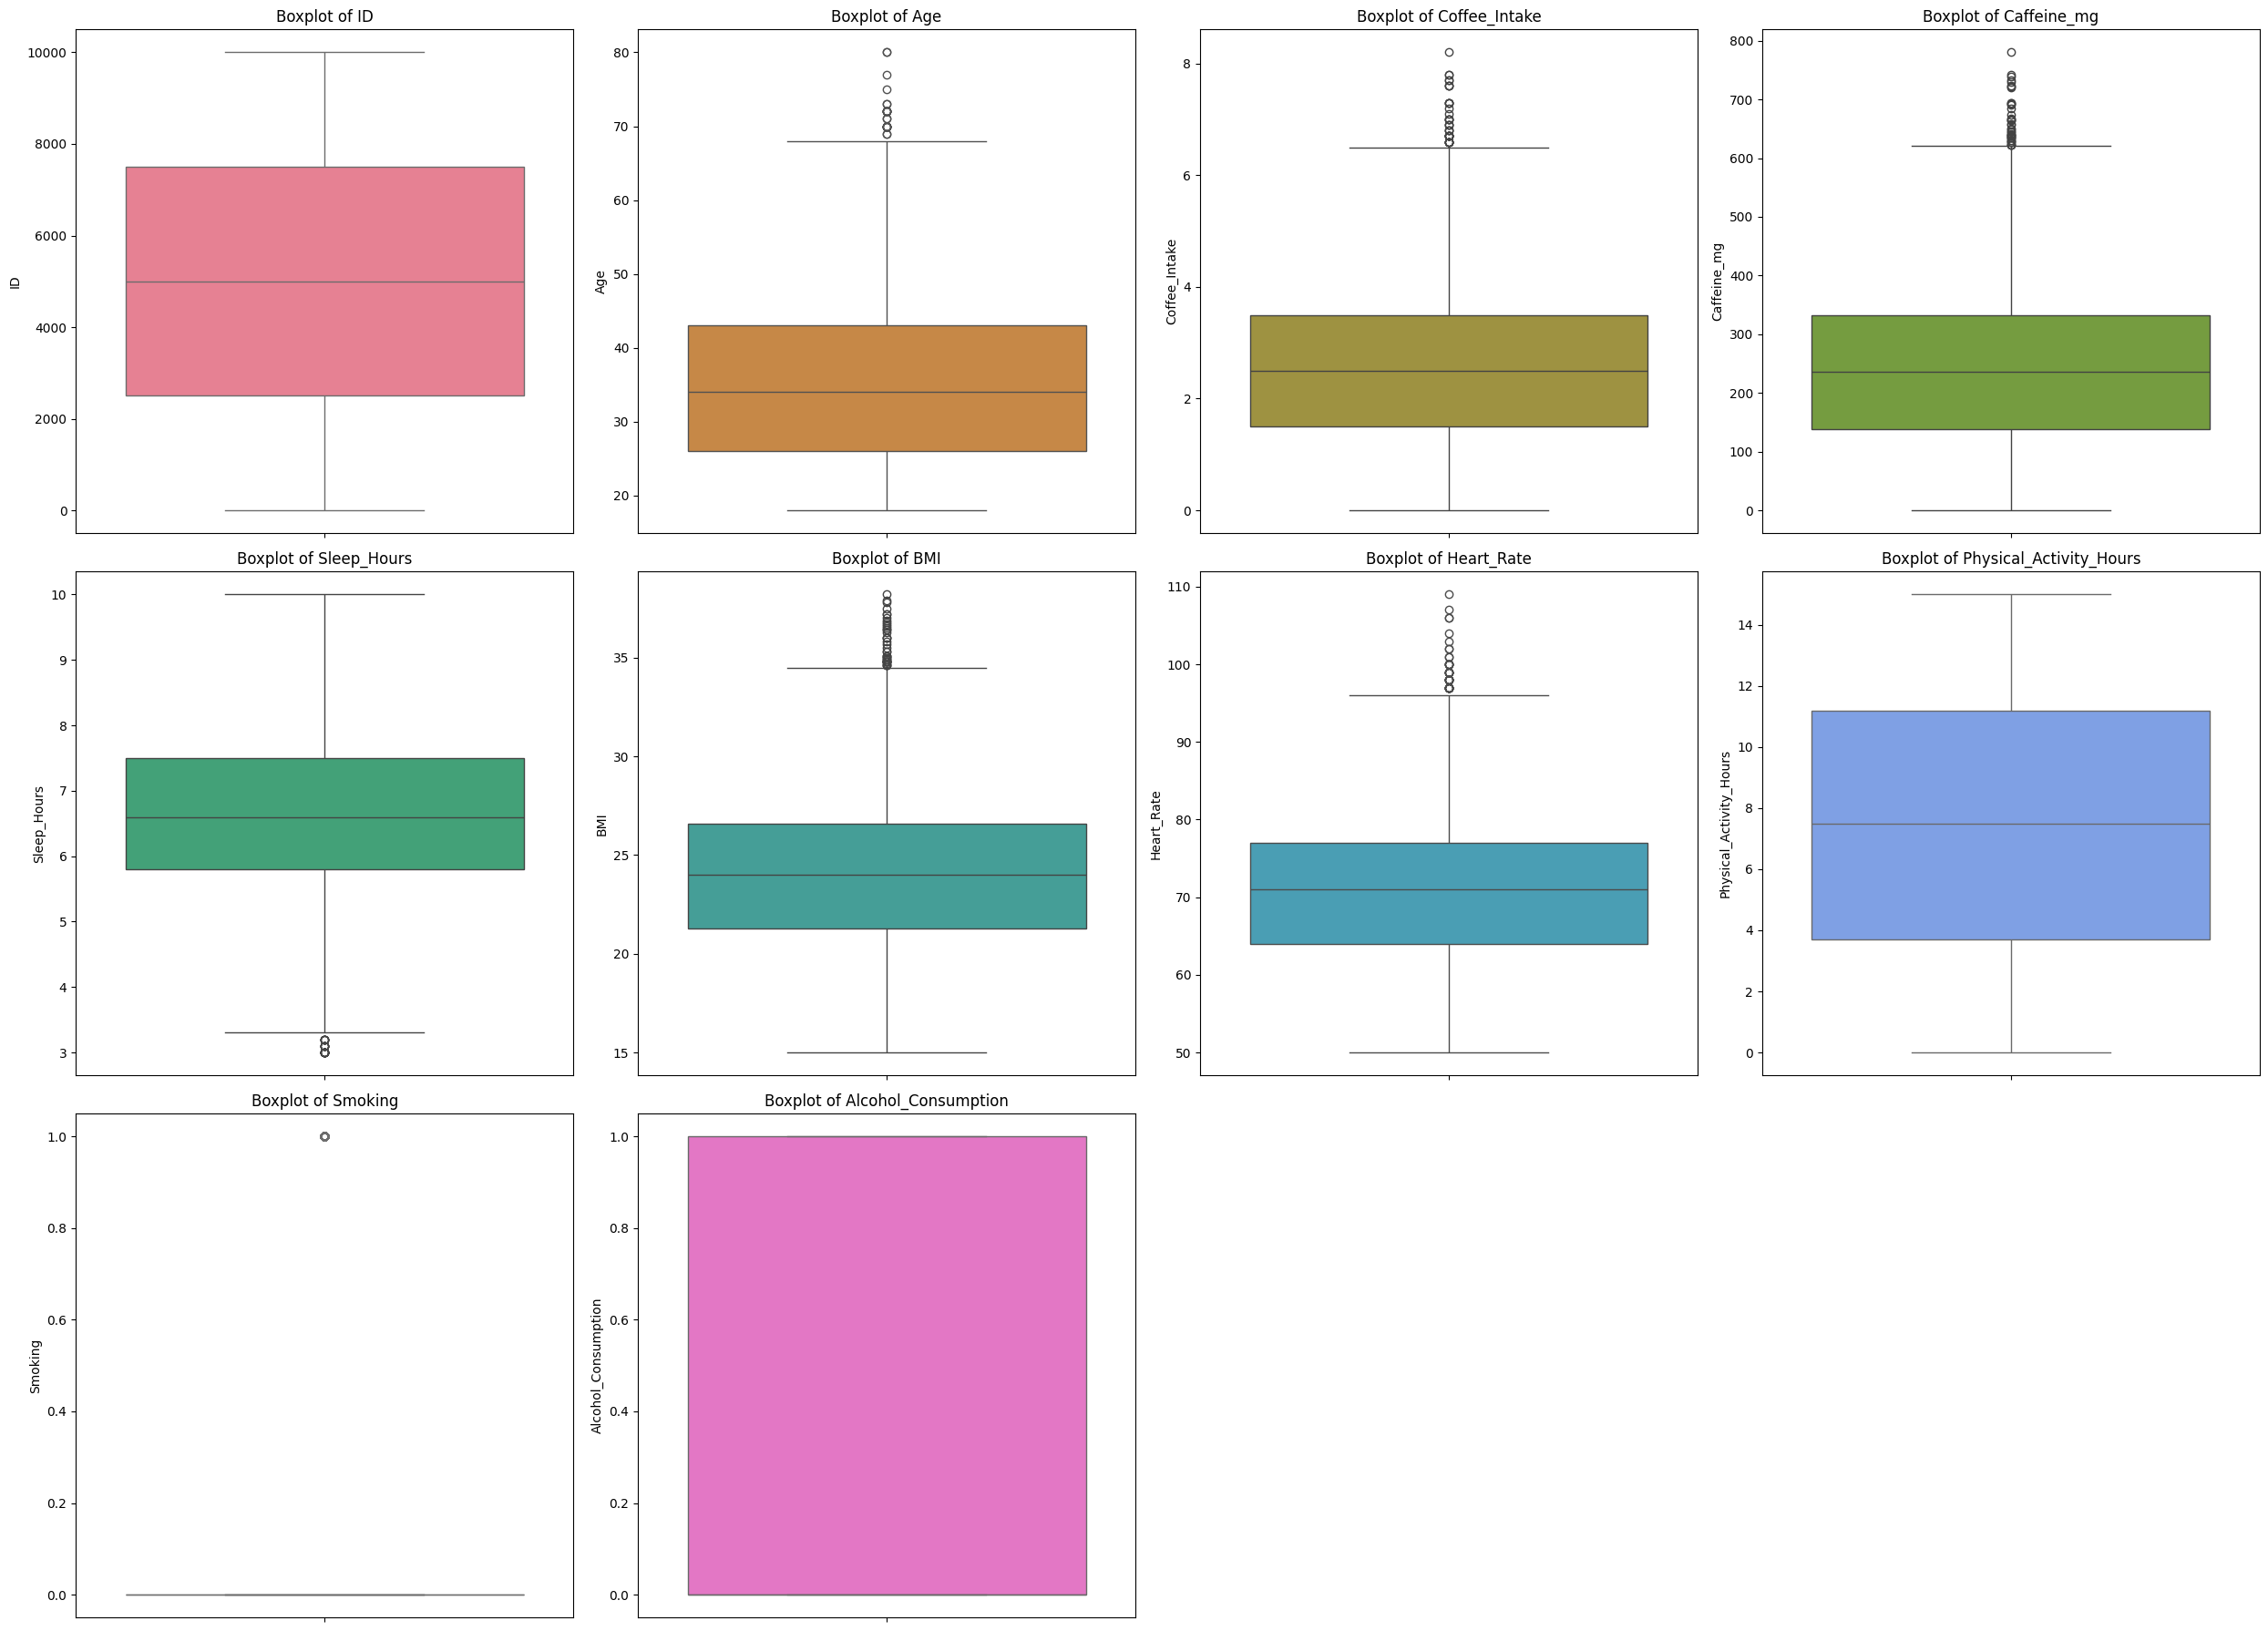

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

palette = sns.color_palette("husl", len(numerical_cols))

plt.figure(figsize=(25, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

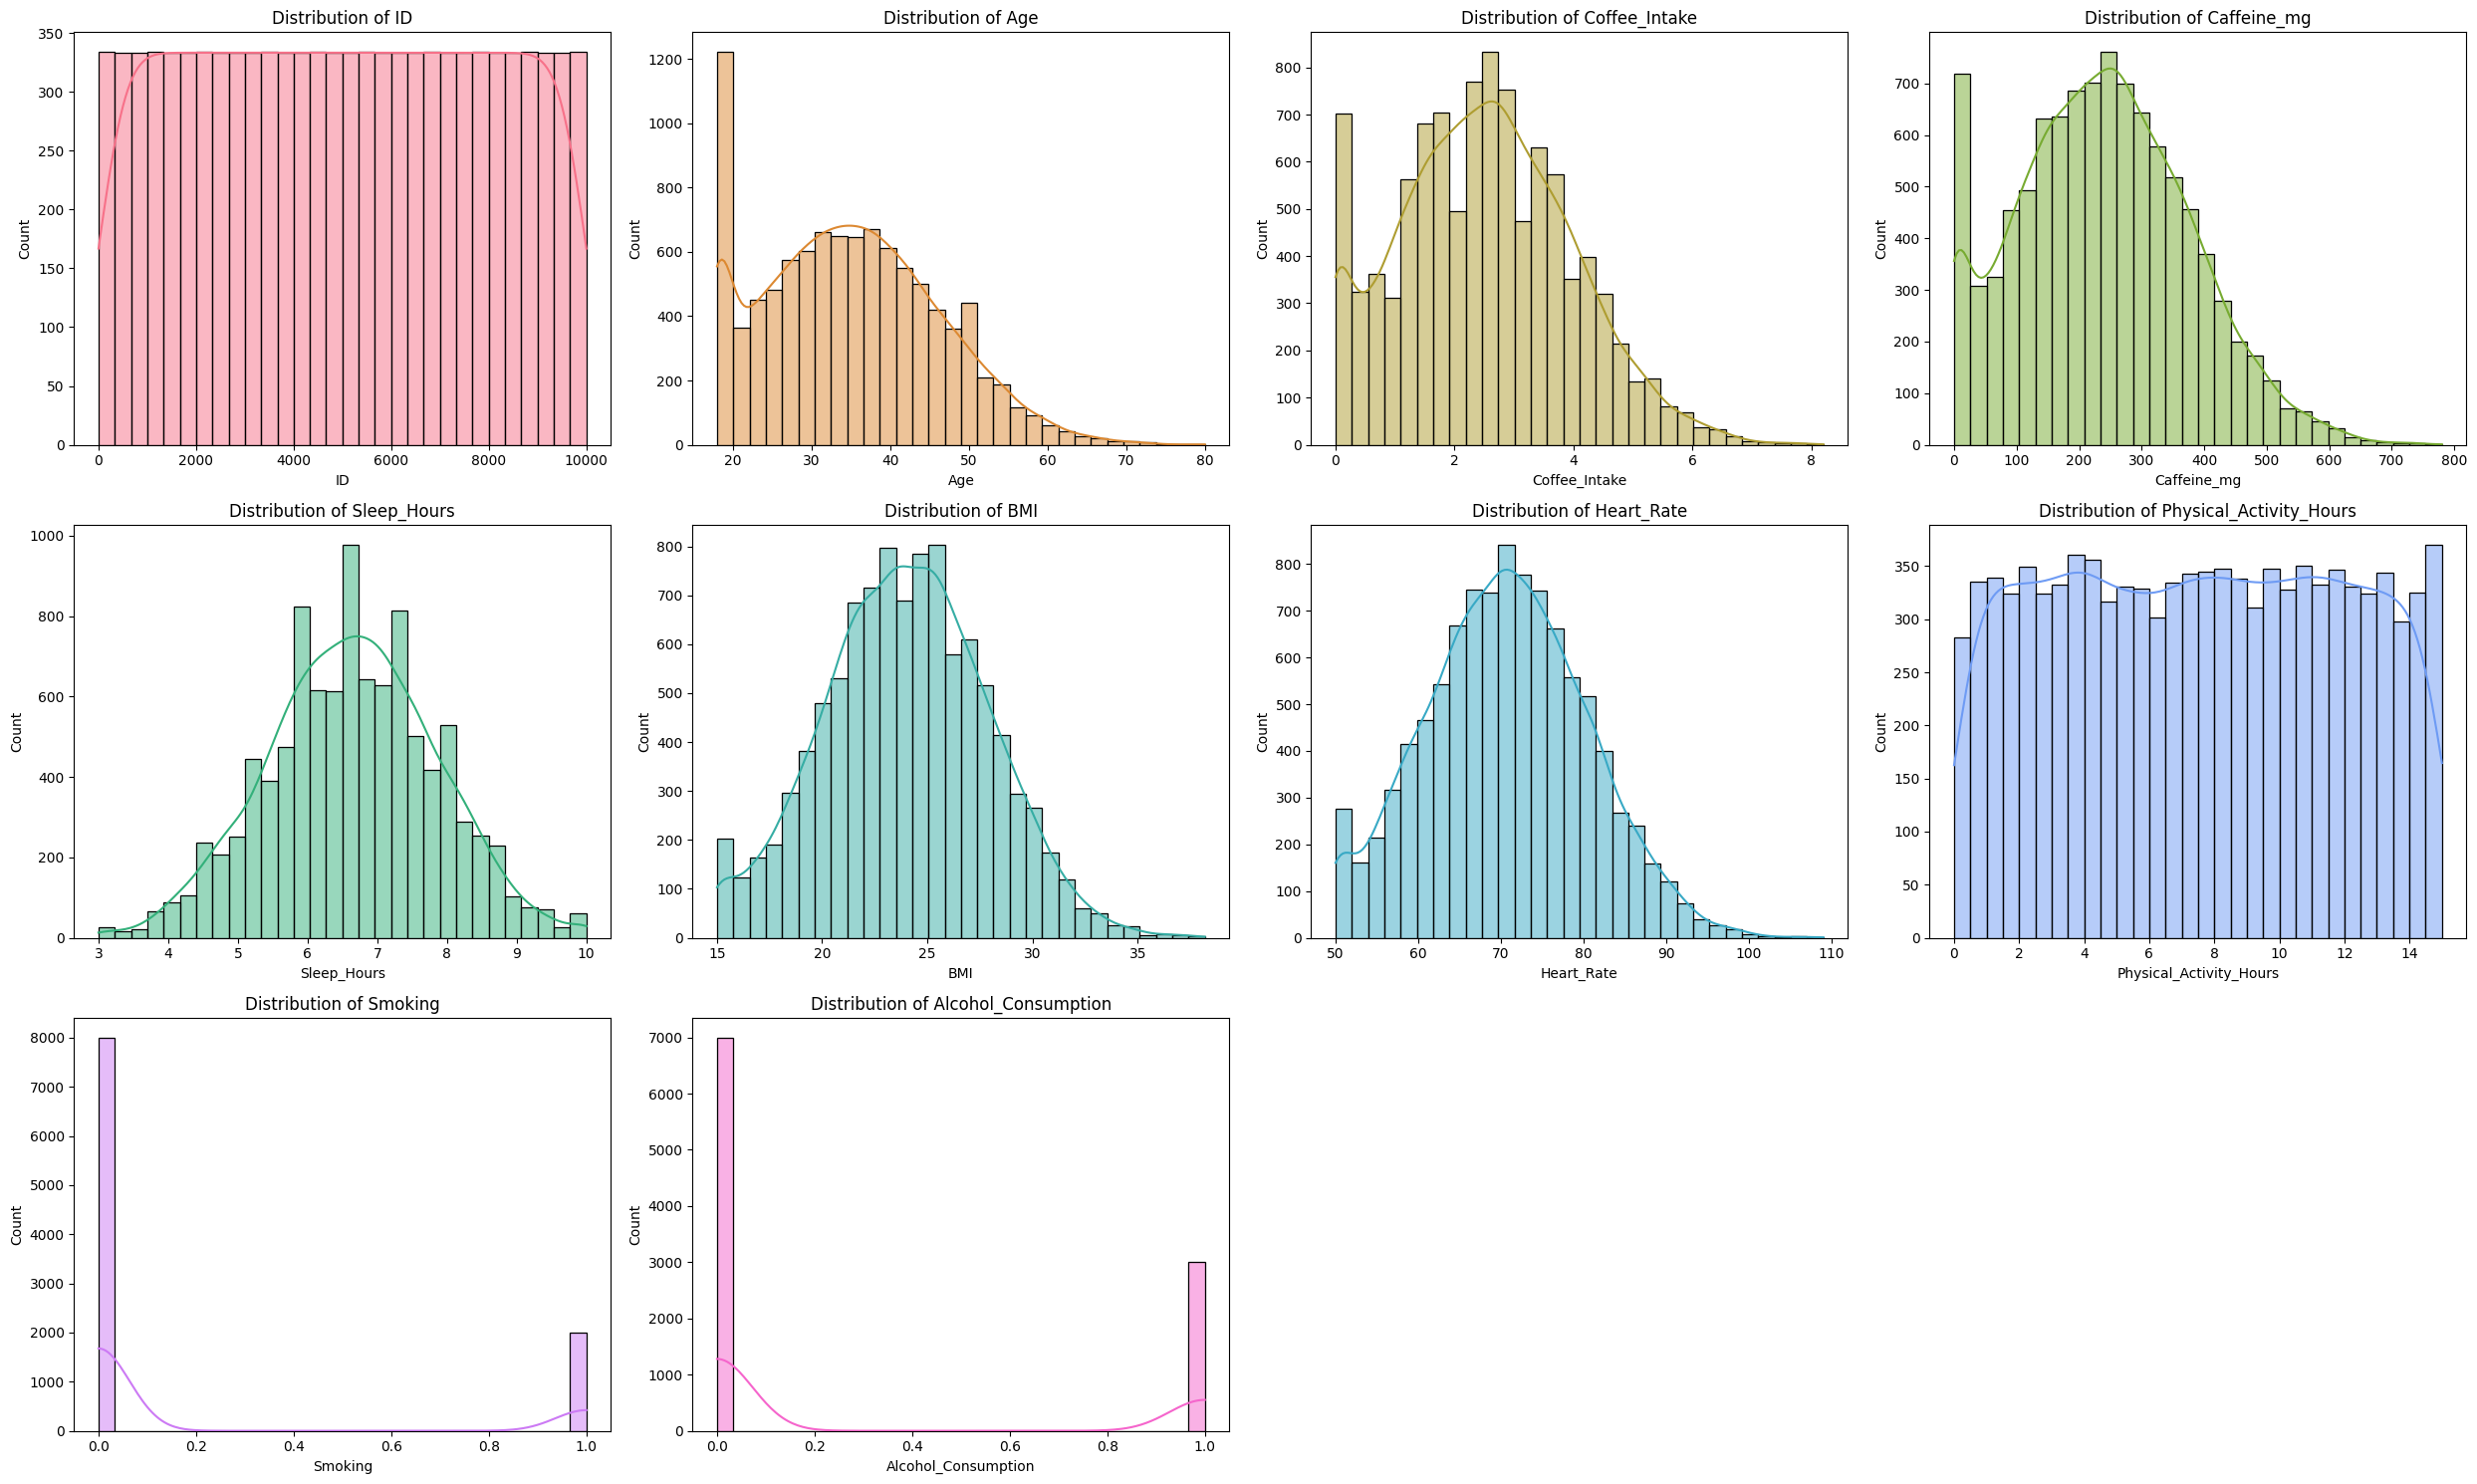

In [ ]:
palette = sns.color_palette("husl", len(numerical_cols))

plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

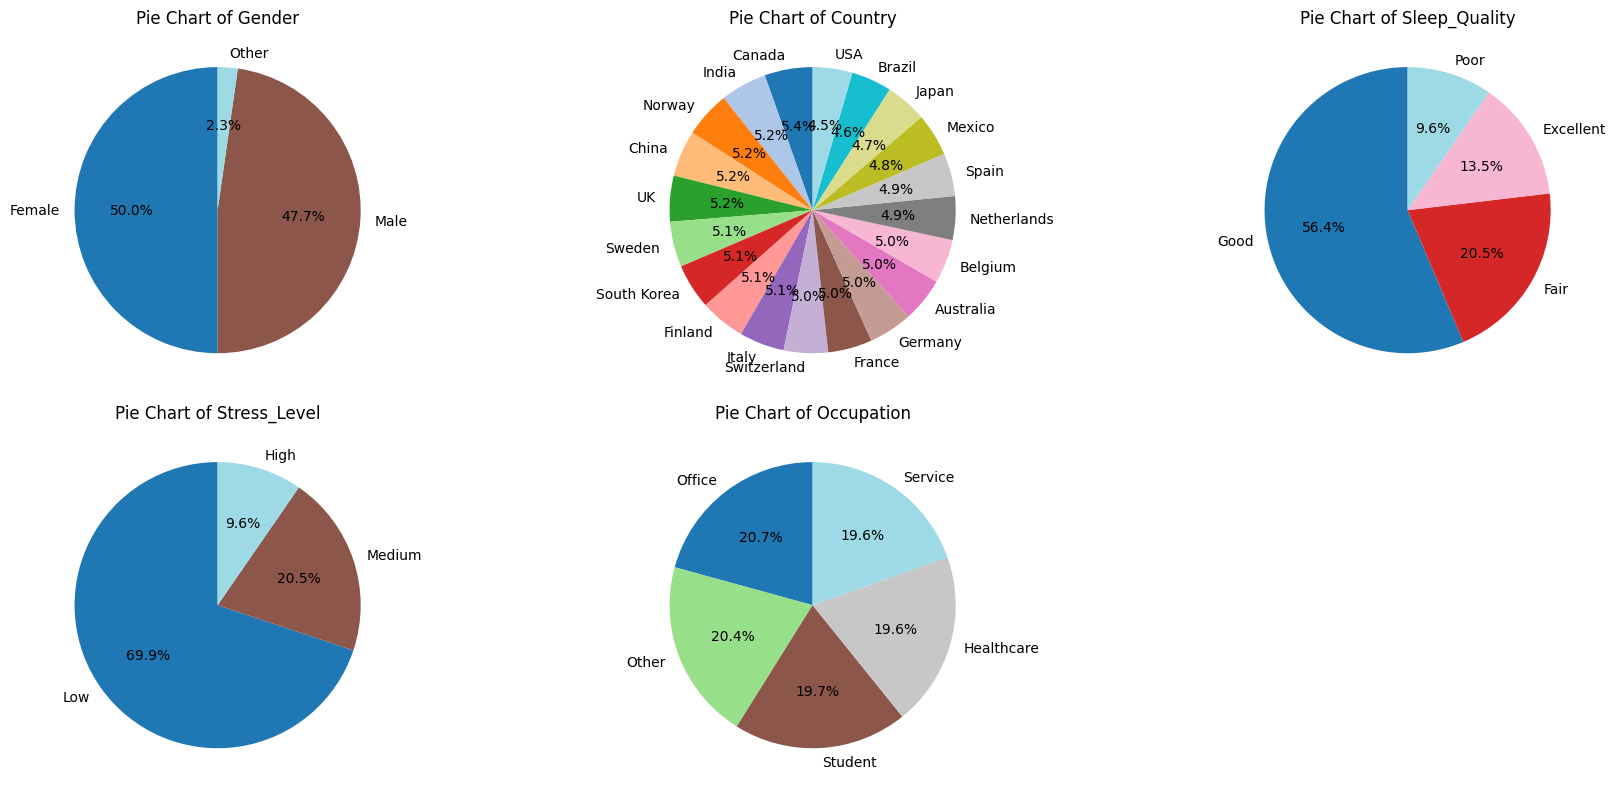

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:

def plot_histograms_by_target(df, target='Sleep_Quality', exclude_cols=None, bins=30, cols_per_row=3):
    if exclude_cols is None:
        exclude_cols = []


    num_cols = [col for col in df.select_dtypes(include='number').columns if col not in exclude_cols + [target]]
    n = len(num_cols)


    nrows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(nrows, cols_per_row, figsize=(6 * cols_per_row, 4 * nrows))


    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, hue=target, bins=bins, stat="density", element="step", ax=axes[i])
        axes[i].set_title(f'{col} by {target}')


    for j in range(i+1, len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()

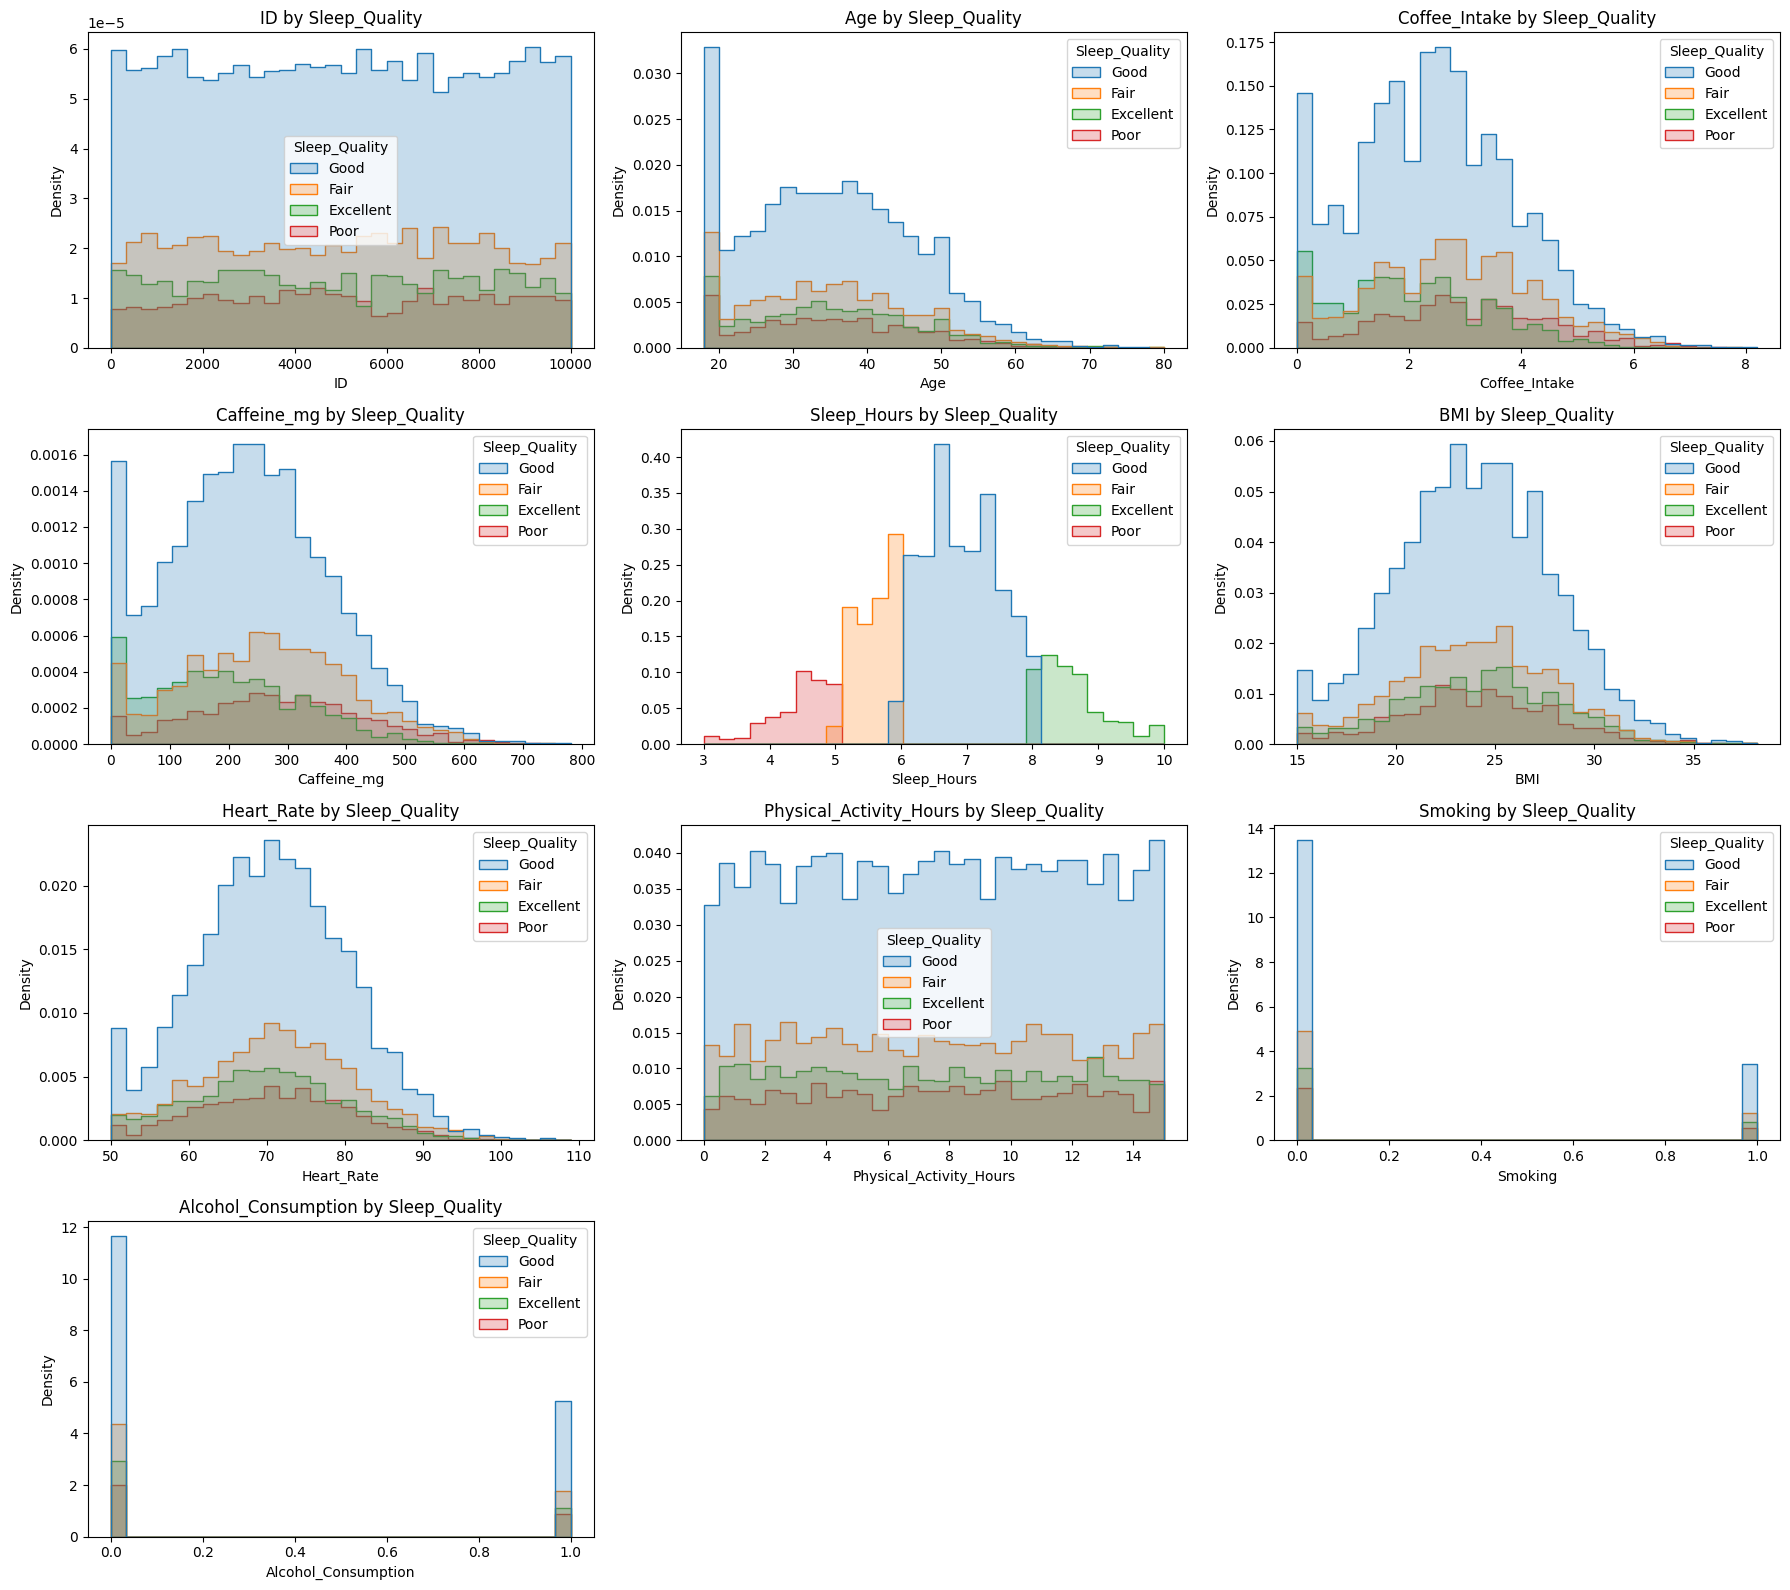

In [ ]:
plot_histograms_by_target(df, target='Sleep_Quality')


/tmp/ipython-input-144697258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep_Quality", y="Caffeine_mg", palette="Set2")


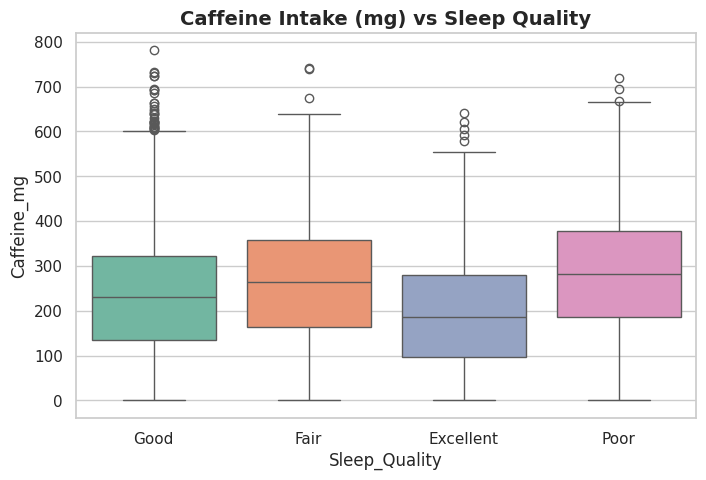

/tmp/ipython-input-144697258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep_Quality", y="Sleep_Hours", palette="Set2")


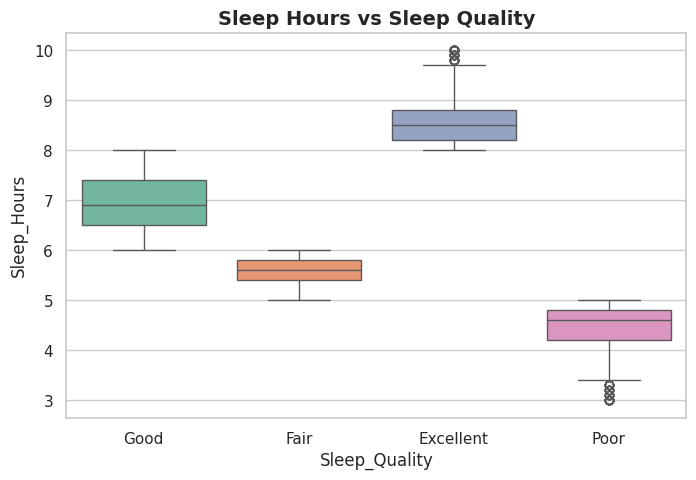

/tmp/ipython-input-144697258.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep_Quality", y="Physical_Activity_Hours", palette="Set2")


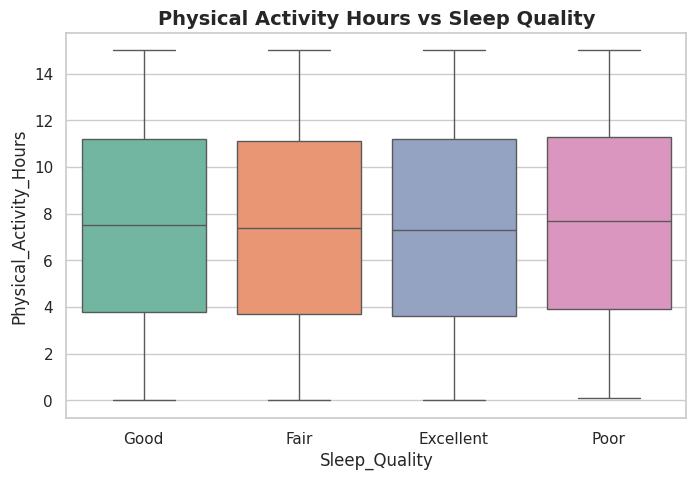

/tmp/ipython-input-144697258.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep_Quality", y="BMI", palette="Set2")


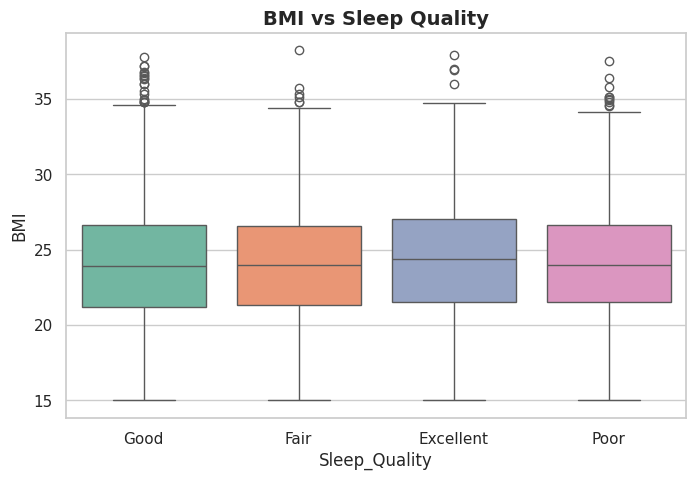

/tmp/ipython-input-144697258.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep_Quality", y="Heart_Rate", palette="Set2")


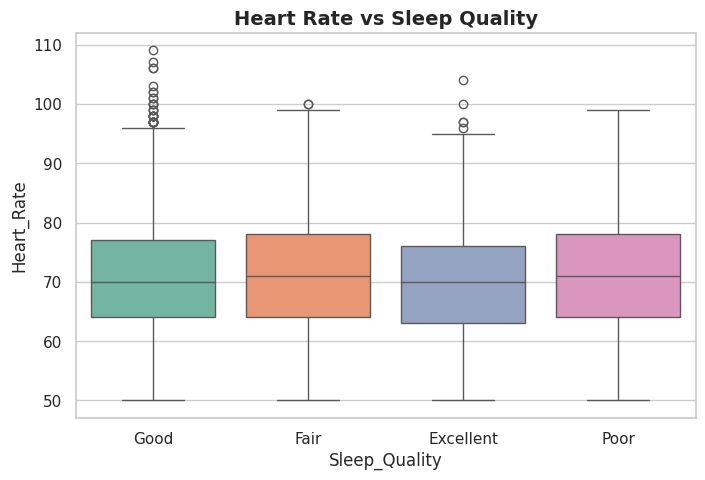

/tmp/ipython-input-144697258.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stress_Level", y="Sleep_Hours", palette="Set2")


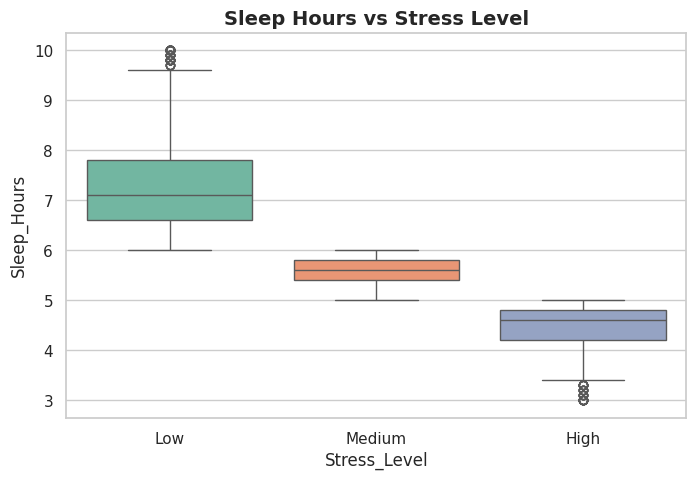

/tmp/ipython-input-144697258.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Stress_Level", y="Coffee_Intake", inner="box", palette="Set2")


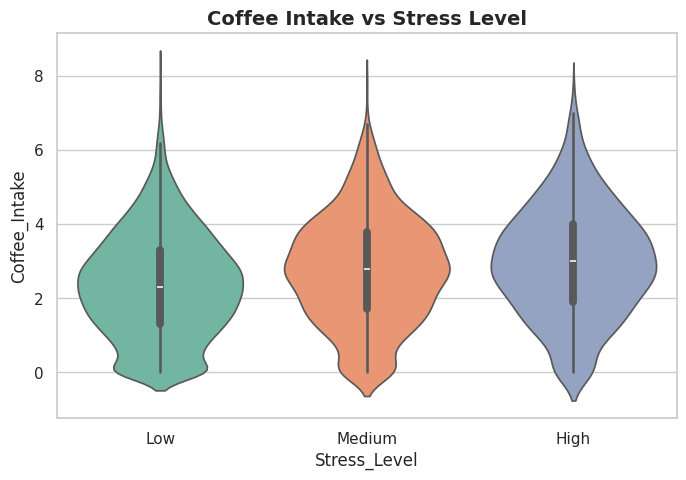

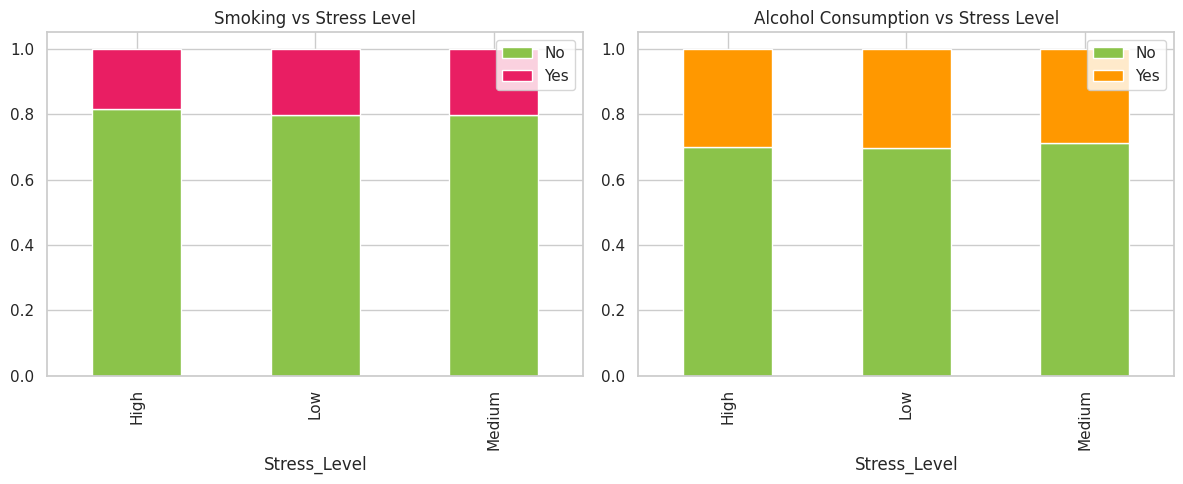

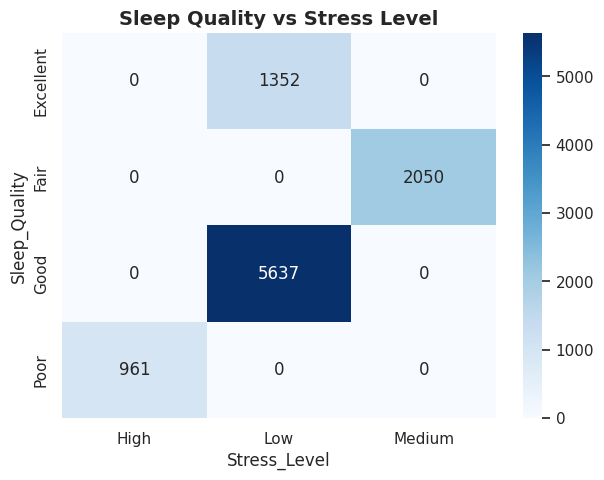

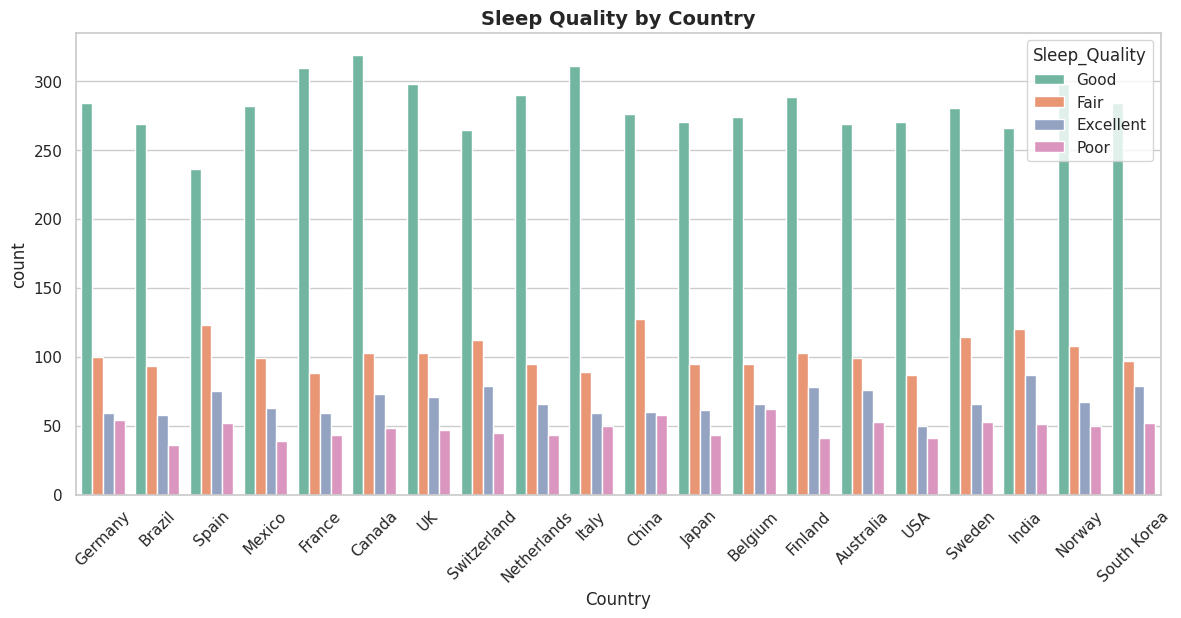

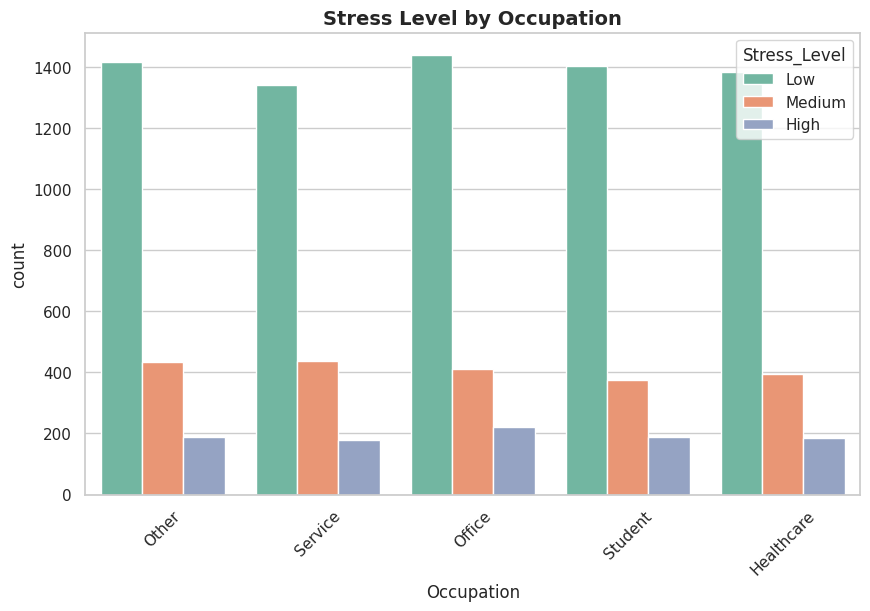

In [ ]:

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep_Quality", y="Caffeine_mg", palette="Set2")
plt.title("Caffeine Intake (mg) vs Sleep Quality", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep_Quality", y="Sleep_Hours", palette="Set2")
plt.title("Sleep Hours vs Sleep Quality", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep_Quality", y="Physical_Activity_Hours", palette="Set2")
plt.title("Physical Activity Hours vs Sleep Quality", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep_Quality", y="BMI", palette="Set2")
plt.title("BMI vs Sleep Quality", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep_Quality", y="Heart_Rate", palette="Set2")
plt.title("Heart Rate vs Sleep Quality", fontsize=14, fontweight="bold")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Stress_Level", y="Sleep_Hours", palette="Set2")
plt.title("Sleep Hours vs Stress Level", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Stress_Level", y="Coffee_Intake", inner="box", palette="Set2")
plt.title("Coffee Intake vs Stress Level", fontsize=14, fontweight="bold")
plt.show()

smoke_stress = pd.crosstab(df["Stress_Level"], df["Smoking"], normalize="index")
alcohol_stress = pd.crosstab(df["Stress_Level"], df["Alcohol_Consumption"], normalize="index")

fig, axes = plt.subplots(1,2, figsize=(12,5))
smoke_stress.plot(kind="bar", stacked=True, ax=axes[0], color=["#8bc34a", "#e91e63"])
axes[0].set_title("Smoking vs Stress Level")
axes[0].legend(["No", "Yes"])

alcohol_stress.plot(kind="bar", stacked=True, ax=axes[1], color=["#8bc34a", "#ff9800"])
axes[1].set_title("Alcohol Consumption vs Stress Level")
axes[1].legend(["No", "Yes"])

plt.tight_layout()
plt.show()

crosstab_sleep_stress = pd.crosstab(df["Sleep_Quality"], df["Stress_Level"])
plt.figure(figsize=(7,5))
sns.heatmap(crosstab_sleep_stress, annot=True, cmap="Blues", fmt="d")
plt.title("Sleep Quality vs Stress Level", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Country", hue="Sleep_Quality", palette="Set2")
plt.title("Sleep Quality by Country", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Occupation", hue="Stress_Level", palette="Set2")
plt.title("Stress Level by Occupation", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# Modelo preditivo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
df_encoded = df.copy()
le = LabelEncoder()

In [ ]:
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] =le.fit_transform(df_encoded[col])

In [ ]:
df_encoded.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,7,3.5,328.1,7.5,2,24.9,78,1,14.5,2,0,0
1,2,33,1,7,1.0,94.1,6.2,2,20.0,67,1,11.0,3,0,0
2,3,42,1,2,5.3,503.7,5.9,1,22.7,59,2,11.2,1,0,0
3,4,53,1,7,2.6,249.2,7.3,2,24.7,71,1,6.6,2,0,0
4,5,32,0,15,3.1,298.0,5.3,1,24.1,76,2,8.5,4,0,1


In [ ]:
def categorize_stress(level):
    if level == 'Low':
        return 'Low'
    elif level == 'Medium':
        return 'Medium'
    elif level == 'High':
        return 'High'
    else:
        return 'Unknown'

df['Stress_Category'] = df['Stress_Level'].apply(categorize_stress)

df['Stress_Category'] = df['Stress_Category'].astype(str)

display(df.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Stress_Category
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,Low
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,Low
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,Medium
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,Low
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,Medium


In [ ]:
df_encoded["Stress_Category"]= le.fit_transform(df["Stress_Category"])
print("Unique Encoded Values for Stress_Category:", df["Stress_Category"].unique())

Unique Encoded Values for Stress_Category: ['Low' 'Medium' 'High']


In [ ]:
X = df_encoded.drop(["Sleep_Quality", "Stress_Level"], axis=1)


In [ ]:
y_sleep = df_encoded["Sleep_Quality"]

In [ ]:

from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_sleep, test_size=0.2, random_state=42)

In [ ]:

rf_sleep = RandomForestClassifier(random_state=42)
rf_sleep.fit(X_train_s, y_train_s)

RandomForestClassifier(random_state=42)

In [ ]:

y_pred_sleep = rf_sleep.predict(X_test_s)

In [ ]:

print("==== Sleep Quality Model ====")
print("Accuracy:", accuracy_score(y_test_s, y_pred_sleep))
print("F1 Score:", f1_score(y_test_s, y_pred_sleep, average="weighted"))
print("Classification Report:\n", classification_report(y_test_s, y_pred_sleep))

==== Sleep Quality Model ====
Accuracy: 0.9895
F1 Score: 0.989447583947584
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       273
           1       1.00      1.00      1.00       375
           2       0.99      0.99      0.99      1162
           3       1.00      1.00      1.00       190

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



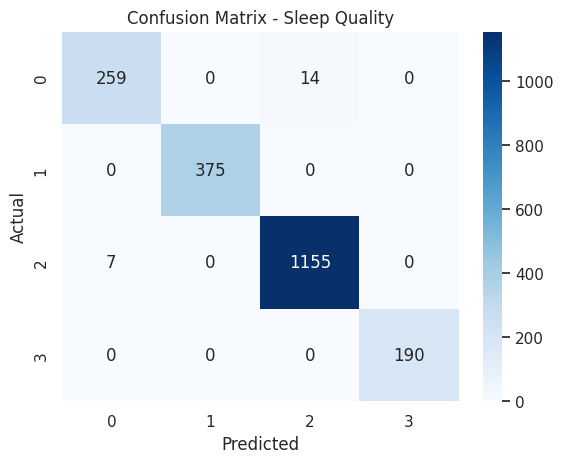

In [ ]:

cm_sleep = confusion_matrix(y_test_s, y_pred_sleep)
sns.heatmap(cm_sleep, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Sleep Quality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top 10 Important Features for Sleep_Quality:
                    Feature  Importance
6               Sleep_Hours    0.565519
13          Stress_Category    0.363037
5               Caffeine_mg    0.011436
0                        ID    0.009405
7                       BMI    0.008315
9   Physical_Activity_Hours    0.007738
4             Coffee_Intake    0.007553
8                Heart_Rate    0.007236
1                       Age    0.007059
3                   Country    0.005383


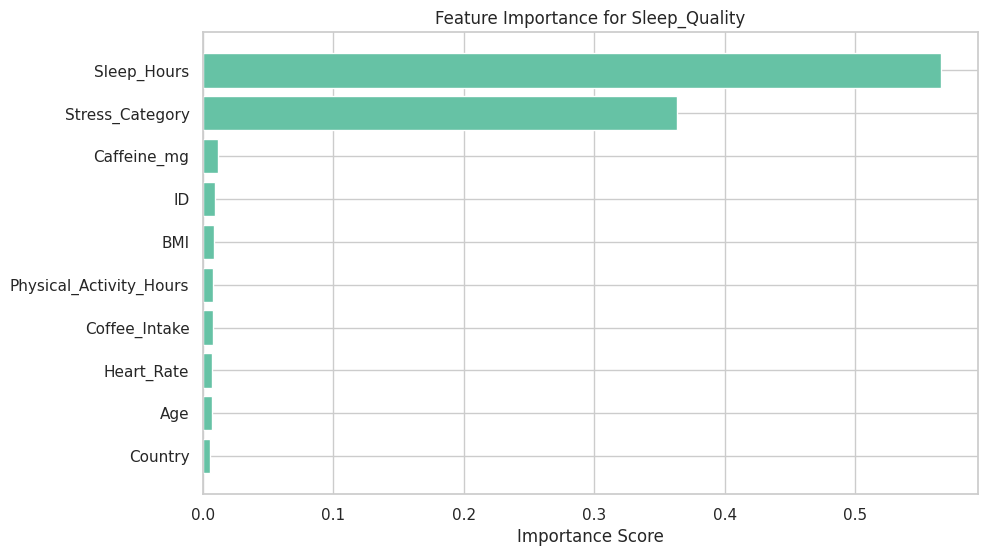

In [ ]:
importances_sleep = rf_sleep.feature_importances_

feat_imp_sleep = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_sleep
}).sort_values(by="Importance", ascending=False)

print("Top 10 Important Features for Sleep_Quality:")
print(feat_imp_sleep.head(10))

plt.figure(figsize=(10,6))
plt.barh(feat_imp_sleep["Feature"].head(10), feat_imp_sleep["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Feature Importance for Sleep_Quality")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
y_stress = df_encoded["Stress_Level"]


In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_stress, test_size=0.2, random_state=42)

In [ ]:
rf_stress = RandomForestClassifier(random_state=42)
rf_stress.fit(X_train_t, y_train_t)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_stress = rf_stress.predict(X_test_t)

In [ ]:
print("\n==== Stress Level Model ====")
print("Accuracy:", accuracy_score(y_test_t, y_pred_stress))
print("F1 Score:", f1_score(y_test_t, y_pred_stress, average="weighted"))
print("Classification Report:\n", classification_report(y_test_t, y_pred_stress))


==== Stress Level Model ====
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00      1435
           2       1.00      1.00      1.00       375

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<function matplotlib.pyplot.show(close=None, block=None)>

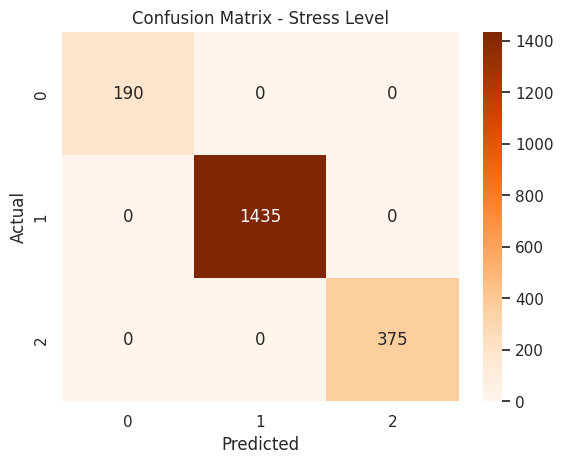

In [ ]:
cm_stress = confusion_matrix(y_test_t, y_pred_stress)
sns.heatmap(cm_stress, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Stress Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

Top 10 Important Features for Stress_Level:
                    Feature  Importance
6               Sleep_Hours    0.512208
13          Stress_Category    0.457566
5               Caffeine_mg    0.007952
4             Coffee_Intake    0.004622
0                        ID    0.003624
7                       BMI    0.002737
9   Physical_Activity_Hours    0.002636
8                Heart_Rate    0.002560
1                       Age    0.002121
3                   Country    0.001800


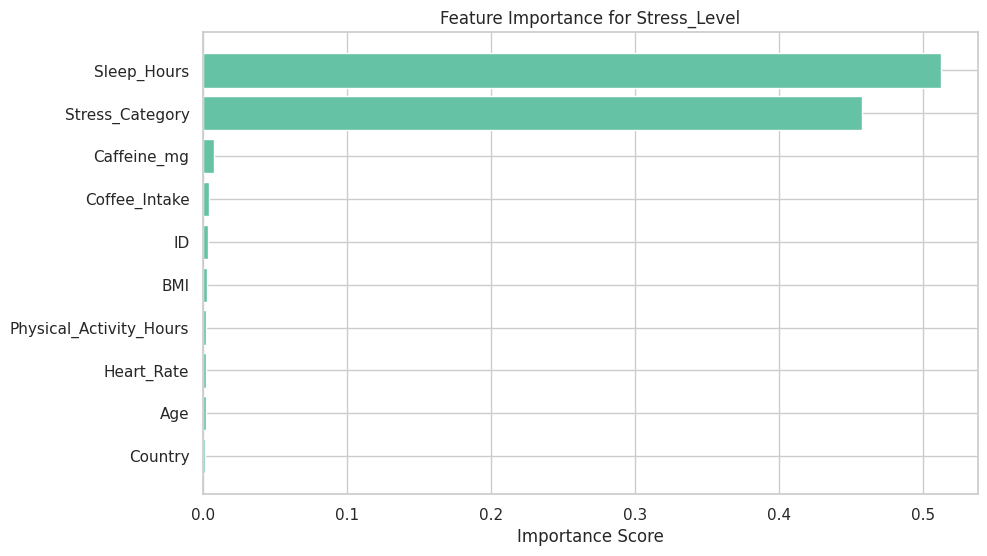

In [ ]:
importances_stress = rf_stress.feature_importances_

feat_imp_stress = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_stress
}).sort_values(by="Importance", ascending=False)

print("Top 10 Important Features for Stress_Level:")
print(feat_imp_stress.head(10))

plt.figure(figsize=(10,6))
plt.barh(feat_imp_stress["Feature"].head(10), feat_imp_stress["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Feature Importance for Stress_Level")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
df_encoded.to_csv('coffee_health.csv', index=False)
